In [138]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin

In [139]:
n_colors = 64

# Load the Panda photo

In [140]:
china = load_sample_image("china.jpg")

 Convert to floats instead of the default 8 bits integer coding. Dividing by
 255 is important so that plt.imshow behaves works well on float data (need to be in the range [0-1])

In [141]:
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.

In [142]:
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.170s.


C:\Users\Hp\OneDrive\Pictures\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


# Get labels for all points

In [143]:
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

Predicting color indices on the full image (k-means)
done in 0.111s.
Predicting color indices on the full image (random)
done in 0.178s.


# Display all results, alongside original image

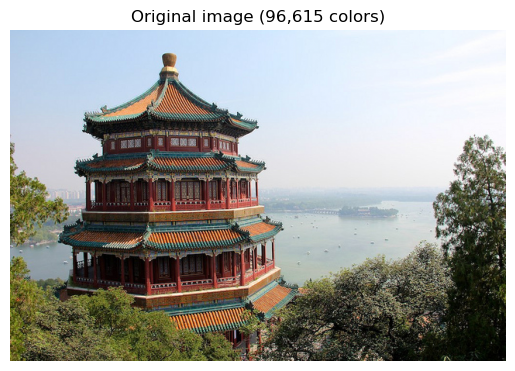

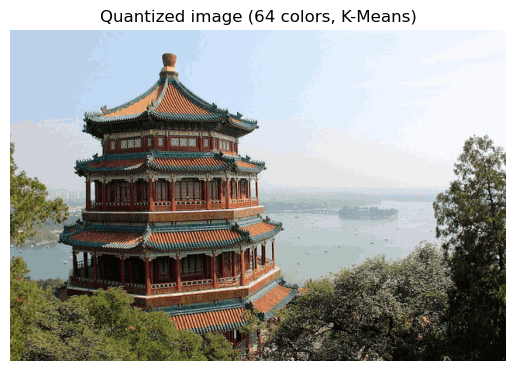

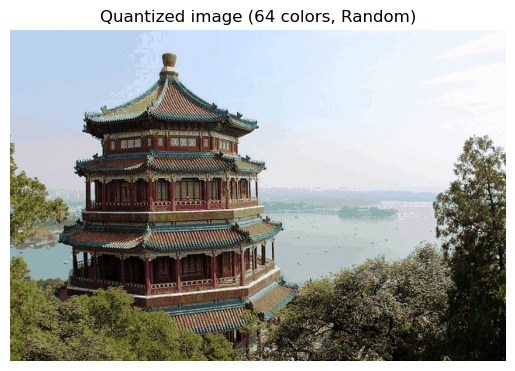

In [144]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

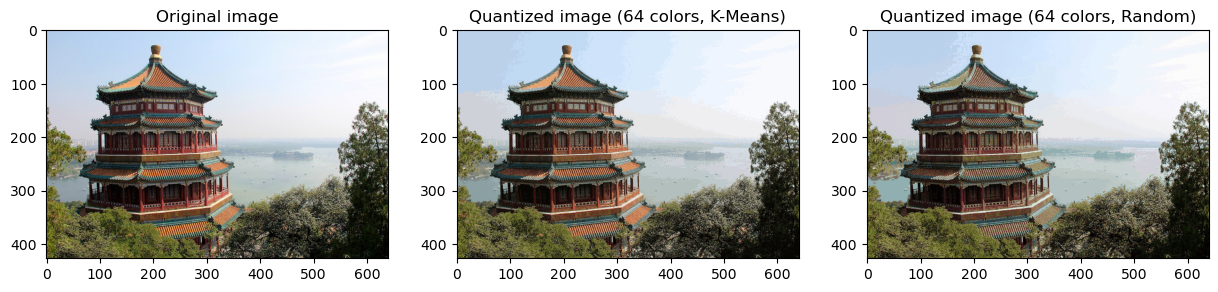

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(china)
axes[0].set_title("Original image")

axes[1].imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
axes[1].set_title(f"Quantized image ({n_colors} colors, K-Means)")

axes[2].imshow(recreate_image(codebook_random, labels_random, w, h))
axes[2].set_title(f"Quantized image ({n_colors} colors, Random)")

plt.show()


The original image has 96,615 colors, which is a very high number of colors. This means that the image is very detailed and has a lot of variation in the colors. The k-means quantized image uses only 16 colors, which is a much smaller number of colors. This means that the image is less detailed and has less variation in the colors. The random quantized image also uses only 16 colors, but the colors are clustered differently than in the k-means quantized image. This results in a different overall look for the image.

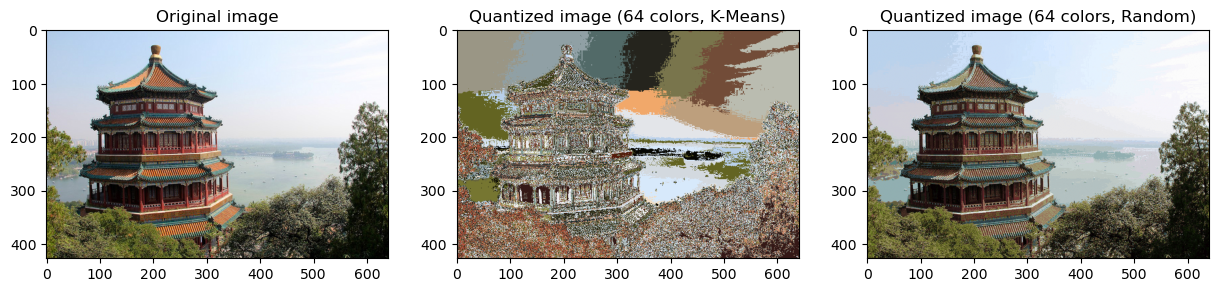

In [146]:
kmeans = KMeans(n_clusters=n_colors, n_init=100, random_state=0)
kmeans.fit(image_array)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(china)
axes[0].set_title("Original image")

axes[1].imshow(recreate_image(cluster_centers, labels, w, h))
axes[1].set_title(f"Quantized image ({n_colors} colors, K-Means)")

axes[2].imshow(recreate_image(codebook_random, labels_random, w, h))
axes[2].set_title(f"Quantized image ({n_colors} colors, Random)")

plt.show()


In [147]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""

    # Check that the labels are all less than the size of the codebook
    for i, label in enumerate(labels):
        if label >= len(codebook):
            raise IndexError(f"Label {label} is out of bounds for codebook of size {len(codebook)}")

    return codebook[labels].reshape(w, h, -1)

In [148]:
def main():
    china = load_sample_image("china.jpg")

 # Convert the image to floats

In [149]:
china = china.astype(np.float64)

 # Divide the image by 255

In [150]:
china = china / 255

 # Reshape the image

In [151]:
 w, h, d = china.shape
image_array = np.reshape(china, (w * h, d))

In [152]:
n_colors = 16

# K-Means quantization

In [153]:
kmeans = KMeans(n_clusters=n_colors, random_state=0)
kmeans.fit(image_array)

C:\Users\Hp\OneDrive\Pictures\conda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=16, random_state=0)

# Get the cluster centers

In [154]:
   cluster_centers = kmeans.cluster_centers_

# Get the labels

In [155]:
labels = kmeans.labels_

# Recreate the image

In [156]:
compressed_image = recreate_image(cluster_centers, labels, w, h)  # Using labels from K-Means

# Plot the images

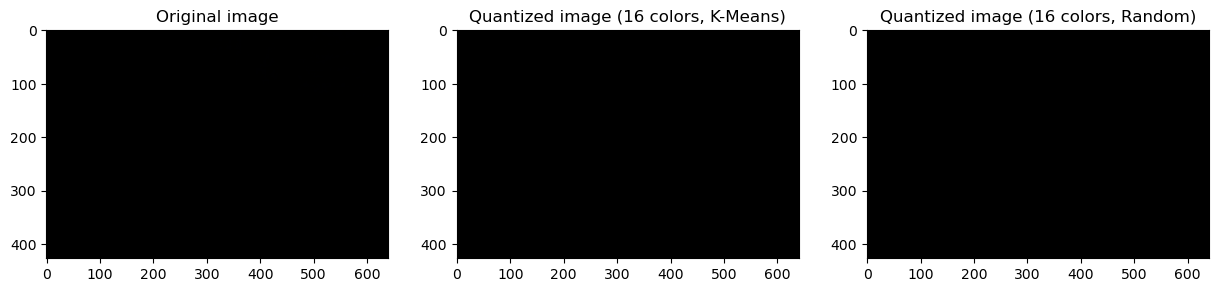

In [159]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(china)
axes[0].set_title("Original image")

axes[1].imshow(compressed_image)
axes[1].set_title(f"Quantized image ({n_colors} colors, K-Means)")

# Recreate the image using the same labels from K-Means
axes[2].imshow(recreate_image(cluster_centers, labels, w, h))
axes[2].set_title(f"Quantized image ({n_colors} colors, Random)")

plt.show()

if __name__ == "__main__":
    main()


C:\Users\Hp\OneDrive\Pictures\conda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


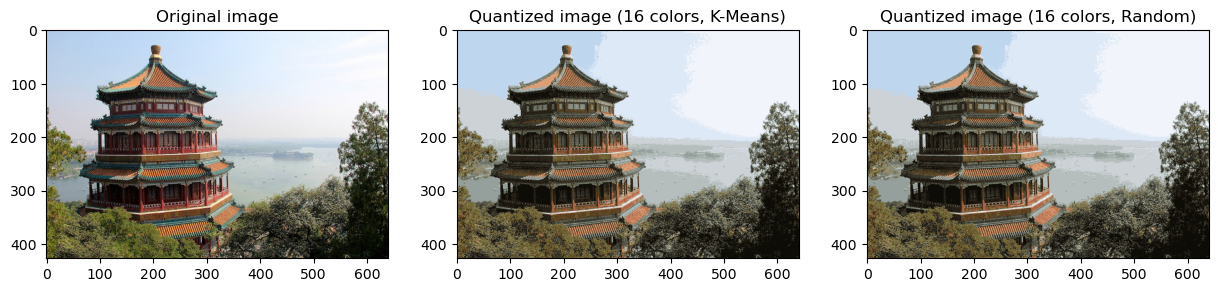

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    for i, label in enumerate(labels):
        if label >= len(codebook):
            raise IndexError(f"Label {label} is out of bounds for codebook of size {len(codebook)}")

    return codebook[labels].reshape(w, h, -1)

def main():

    china = load_sample_image("china.jpg")
    china = china.astype(np.float64)
    china = china / 255

    w, h, d = china.shape
    image_array = np.reshape(china, (w * h, d))
    n_colors = 16

    kmeans = KMeans(n_clusters=n_colors, random_state=0)
    kmeans.fit(image_array)

    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    compressed_image = recreate_image(cluster_centers, labels, w, h)  # Use labels from K-Means

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(china)
    axes[0].set_title("Original image")

    axes[1].imshow(compressed_image)
    axes[1].set_title(f"Quantized image ({n_colors} colors, K-Means)")

    # Recreate the image using the same labels from K-Means
    axes[2].imshow(recreate_image(cluster_centers, labels, w, h))
    axes[2].set_title(f"Quantized image ({n_colors} colors, Random)")

    plt.show()

if __name__ == "__main__":
    main()
